# KMEANS 

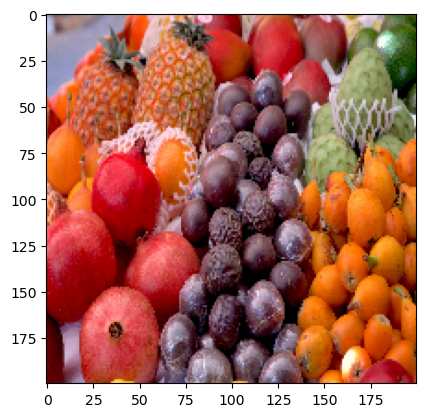

In [2]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

img = cv2.imread("data/fruit.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (200, 200))

h, w, _ = img.shape
X = img.reshape((h * w, 3))

plt.imshow(img)
plt.show() 


In [5]:
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

cluster_centers

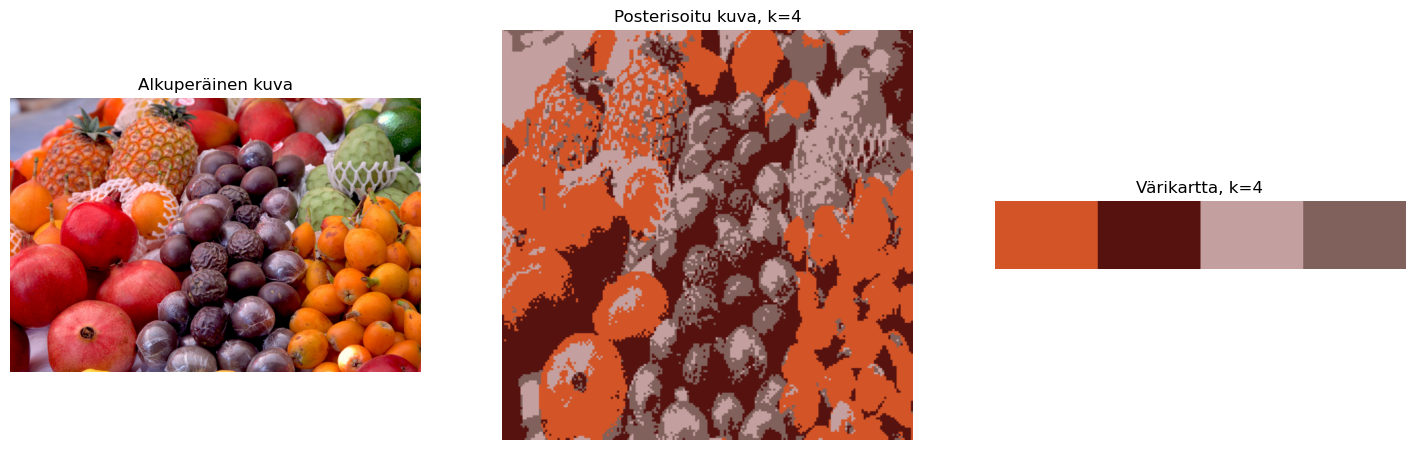

In [9]:
img = cv2.imread("data/fruit.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_resized = cv2.resize(img_rgb, (200, 200))

h, w, _ = img_resized.shape
X = img_resized.reshape(h * w, 3)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_.astype(int)

labels = kmeans.labels_ 
posterized_img = cluster_centers[labels].reshape(img_resized.shape)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(img_rgb)
ax[0].set_title("Alkuperäinen kuva")
ax[0].axis('off')

ax[1].imshow(posterized_img.astype(np.uint8))
ax[1].set_title(f"Posterisoitu kuva, k={k}")
ax[1].axis('off')

color_strip = np.zeros((50, 300, 3), dtype=int)
width_per_color = 300 // k

for i, color in enumerate(cluster_centers):
    color_strip[:, i*width_per_color:(i+1)*width_per_color, :] = color

ax[2].imshow(color_strip)
ax[2].set_title(f"Värikartta, k={k}")
ax[2].axis('off')

plt.show()
